# 1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

n = 200
x1 = np.random.uniform(-5, 5, n)
x2 = np.random.uniform(-5, 5, n)

y = 2.1 * x1 - 3.1 * x2

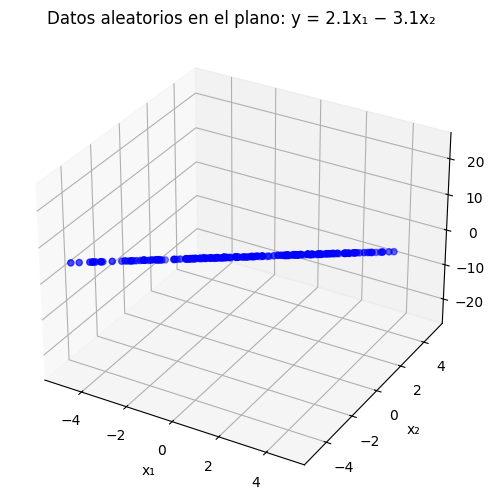

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o')
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("y")
ax.set_title("Datos aleatorios en el plano: y = 2.1x₁ − 3.1x₂")

plt.show()


# 2)

Realizaremos nuevamente el experimiento del punto anterior, con el fin de calcular la función de coste para más de dos dimensiones.

In [9]:
np.random.seed(42)

m = 200
n = 2

x1 = np.random.uniform(-5, 5, m)
x2 = np.random.uniform(-5, 5, m)

y = 2.1 * x1 - 3.1 * x2

Y = y.reshape(1, m)

# 3)

Inicializamos las matrices $X$ y $\Theta$

In [17]:
X = np.vstack((np.ones(m), x1, x2))
print("Forma de X:", X.shape)

Forma de X: (3, 200)


In [11]:
Theta = np.random.randn(n+1, 1)
print("Theta inicial:\n", Theta)

Theta inicial:
 [[1.30547881]
 [0.02100384]
 [0.68195297]]


# 4)

Realizamos funciones para calcular la función de coste para esta situación multivariada. Para ellos trabajaremos con matrices.

In [12]:
def cost_function(X, Y, Theta):
    m = X.shape[1]
    h = Theta.T @ X
    Λ = h - Y
    J = (1 / (2 * m)) * np.sum(Λ ** 2)
    return J, Λ

def gradient_descent(X, Y, Theta, alpha=0.001, iterations=5000):
    m = X.shape[1]
    J_history = []

    for i in range(iterations):
        J, Λ = cost_function(X, Y, Theta)
        grad = (1/m) * (Λ @ X.T).T
        Theta = Theta - alpha * grad
        J_history.append(J)

    return Theta, J_history


# 6)

In [21]:
Theta_final, J_hist = gradient_descent(X, Y, Theta, alpha=0.001, iterations=10000)

print("Parámetros finales:\n", Theta_final)
print(f"θ0 = {Theta_final[0,0]:.3f}, θ1 = {Theta_final[1,0]:.3f}, θ2 = {Theta_final[2,0]:.3f}")


Parámetros finales:
 [[ 6.15442048e-05]
 [ 2.10000001e+00]
 [-3.09999929e+00]]
θ0 = 0.000, θ1 = 2.100, θ2 = -3.100


Finalmente como detalle extra, graficaremos los valores para ver cómo se ajustan al plano.

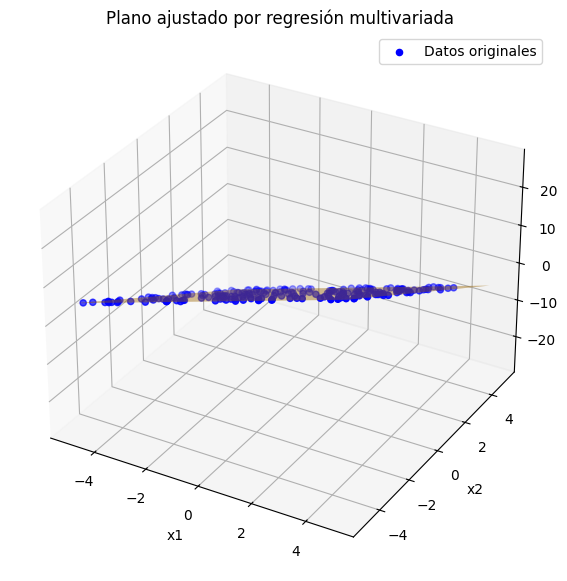

array([[ 5.81465535e-05],
       [ 2.10000120e+00],
       [-3.10000030e+00]])

In [14]:
x1_range = np.linspace(-5, 5, 50)
x2_range = np.linspace(-5, 5, 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred_grid = Theta_final[0] + Theta_final[1] * x1_grid + Theta_final[2] * x2_grid

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='Datos originales')
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, color='orange')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Plano ajustado por regresión multivariada')
ax.legend()
plt.show()

Theta_final


# 7)

Finalmente veremos cómo reescribir el código anterior usando clases.

In [15]:
import numpy as np

class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures, m = X.shape
    self.Nfeatures = Nfeatures
    self.m = m
    self.theta = np.random.random(Nfeatures).reshape(Nfeatures, 1)

  def model(self):
    self.h = self.theta.T @ self.X
    return self.h

  def costo(self):
    Λ = self.h - self.Y
    self.J = (1 / (2 * self.m)) * np.sum(Λ ** 2)
    return self.J

  def update_params(self, learning_rate):
    """
    Gradiente descendente
    """
    Λ = self.h - self.Y
    grad = (1 / self.m) * (Λ @ self.X.T).T
    self.theta = self.theta - learning_rate * grad

  def fit(self, learning_rate):
    for i in range(0, 100):
      self.model()
      self.costo()
      self.update_params(learning_rate)


In [16]:
np.random.seed(0)
m = 200
x1 = np.random.uniform(-5, 5, m)
x2 = np.random.uniform(-5, 5, m)
y = 2.1 * x1 - 3.1 * x2
Y = y.reshape(1, m)
X = np.vstack((np.ones(m), x1, x2))

modelo = MultilinearRegresion(X, Y)

modelo.fit(learning_rate=0.001)

print("Parámetros finales:")
print(modelo.theta)


Parámetros finales:
[[ 0.38113549]
 [ 1.64163998]
 [-1.77641516]]
